# Assignment 5

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [1]:
import requests_cache
import requests
from bs4 import BeautifulSoup
import re
requests_cache.install_cache("cache")

def extractArticleUrls(url, pages = 1):
    """
    Function that extracts all of the links to articles in an Aggie article list
    """
    URLS = list()
    for page in xrange(1,pages+1):
        page = requests.get(url+'page/'+str(page))
        soup = BeautifulSoup(page.content, 'html.parser')
        mainContent = soup.find_all("h2", class_="entry-title")
        for div in mainContent:
            links = div.findAll('a')
            for a in links:
                URLS.append(str(a.get("href")))
    return(URLS)
#result = extractArticleUrls('https://theaggie.org/campus/',4)

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

*   Python 2 displays some Unicode characters as `\uXXXX`. For instance, `\u201c` is a left-facing quotation mark.
    You can convert most of these to ASCII characters with the method call (on a string)
    ```
    .translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    ```
    If you're curious about these characters, you can look them up on [this page](http://unicode.org/cldr/utility/character.jsp), or read 
    more about [what Unicode is](http://unicode.org/standard/WhatIsUnicode.html).

In [2]:
def extractArticleInfo(url):
    """
    Function that extracts the title, text, and author of an Aggie article.
    """
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    #Find author unde strong tag
    find_author = soup.find_all("strong")
    title = soup.find_all("h1", {"itemprop":"headline","class":"entry-title"})[0].string
    #Get the author string
    bold_author = [val.get_text() for val in find_author if "Written" in val.get_text()]
    #Set list to grab all text
    text = list()
    mainContent = soup.find_all("div", {"itemprop":"articleBody", "class":"clearfix"})
    for p in mainContent[0].find_all("p"):
        text.append(p.get_text())
    #Search for index of the last string (author string)
    index = [i for i, item in enumerate(text) if re.search("(@theaggie.org)|[Ww]ritten [Bb]y", item)]

    if index != []:
        lastline = text[index[0]].split('\n')
        text = text[:index[0]]
        if len(lastline) == 2:
            author = lastline[1]
        else:
            author = lastline[0]
    else: 
        author = bold_author
    text = " ".join(text)
    text = text.translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    return({'author':author, 'text': text, 'title': title, 'url' : url})
#extractArticleInfo('https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/')

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [3]:
def articleLookUp(articles, location):
    result = list()
    for item in articles:
        tmp = extractArticleInfo(item)
        tmp["type"] = location
        result.append(tmp)
    return(result)

In [4]:
#Extract 60 campus news and 60 city news
news = list()
articles = extractArticleUrls('https://theaggie.org/campus/', 4)
info = articleLookUp(articles, "Campus")
news += info 
articles = extractArticleUrls('https://theaggie.org/city/', 4)
info =  articleLookUp(articles, "City")
news += info
len(news)

120

In [5]:
import pandas as pd
#Make a dataframe with all the article data
aggieData = pd.DataFrame(news)
aggieData

,author,text,title,type,url
0,Written by: Alyssa Vandenberg — campus@theagg...,"Six senators, new executive team elected Curre...",2017 Winter Quarter election results,Campus,https://theaggie.org/2017/02/24/2017-winter-qu...
1,Written by: Aaron Liss and Raul Castellanos —...,"Wells Fargo faces fraud, predatory lending cha...","University of California, Davis City Council s...",Campus,https://theaggie.org/2017/02/23/university-of-...
2,Written by: Kimia Akbari — campus@theaggie.org,"Faculty, students recount personal tales of im...",Academics unite in peaceful rally against immi...,Campus,https://theaggie.org/2017/02/23/academics-unit...
3,Written by: Kenton Goldsby — campus@theaggie.org,Opening date pushed back to May 1 Students hav...,Memorial Union to reopen Spring Quarter,Campus,https://theaggie.org/2017/02/23/memorial-union...
4,[Written by: Ivan Valenzuela — campus@theaggie...,Veto included revision abandoning creation of ...,ASUCD President Alex Lee vetoes amendment for ...,Campus,https://theaggie.org/2017/02/23/asucd-presiden...
5,Written by: Alyssa Vandenberg — campus@theagg...,"Shaheen's name to remain on ballot, his votes ...",Senate candidate Zaki Shaheen withdraws from race,Campus,https://theaggie.org/2017/02/22/senate-candida...
6,Written by: Aaron Liss — campus@theaggie.org,Students receive email warnings from UC Davis ...,UC Davis experiences several recent hate-based...,Campus,https://theaggie.org/2017/02/21/uc-davis-exper...
7,Written by: Alyssa Vandenberg — campus@theagg...,UC Board of Regents to vote on the appointment...,UC President selects Gary May as new UC Davis ...,Campus,https://theaggie.org/2017/02/21/uc-president-s...
8,Written by: Jeanna Totah — campus@theaggie.org,Tighter policies require greater approval of o...,Katehi controversy prompts decline of UC admin...,Campus,https://theaggie.org/2017/02/20/katehi-controv...
9,[Written by: Ivan Valenzuela — campus@theaggi...,SR #7 asks university to increase capacity for...,ASUCD Senate passes resolution submitting comm...,Campus,https://theaggie.org/2017/02/20/asucd-senate-p...


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

In [9]:
import numpy as np
import nltk
from nltk import corpus
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from wordcloud import WordCloud
plt.style.use('ggplot')
%matplotlib inline

In [10]:
stemmer = PorterStemmer().stem
tokenize = nltk.word_tokenize

def stem(tokens,stemmer = PorterStemmer().stem):
    return [stemmer(w.lower()) for w in tokens] 

def lemmatize(text):
    """
    Extract simple lemmas based on tokenization and stemming
    Input: string
    Output: list of strings (lemmata)
    """
    return stem(tokenize(text))

Question 1: What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

In [11]:
articleDF = aggieData['text']
campusDF = aggieData.loc[aggieData['type'] == 'Campus', 'text']
cityDF = aggieData.loc[aggieData['type'] == 'City', 'text']
articleCorpus = [article for article in articleDF]
campusCorpus = [article for article in campusDF]
cityCorpus = [article for article in cityDF]

In [12]:
from collections import Counter
def grab_words(text): 
    """
    Convert text to lowercase, tokenize words, ignore stopwords, and take only the nouns
    """
    lowercase_sample = text.lower()
    tokens = tokenize(lowercase_sample)
    filtered_words = [word for word in tokens if word not in stopwords.words('english')]
    tags = nltk.pos_tag(tokens)
    return([item for item in tags if item[1] == 'NN'])
def most_common_words(corpus):
    """
    Loop through all articles in a corpus and get the words
    """
    result = [grab_words(article) for article in corpus]
    result = [item for sublist in result for item in sublist]
    return(result)
def generate_word_cloud(text):
    """
    Function to get a wordCloud
    """
    words = ','.join([w[0] for w in text])
    wordcloud = WordCloud().generate(words)
    plt.imshow(wordcloud)
    plt.axis("off")

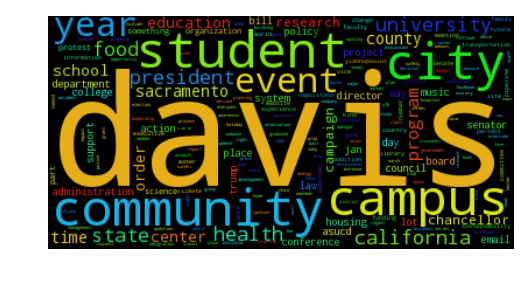

In [13]:
a = most_common_words(articleCorpus)
generate_word_cloud(a)

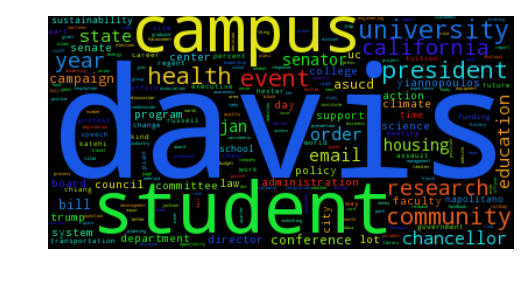

In [14]:
b =  most_common_words(campusCorpus)
generate_word_cloud(b)

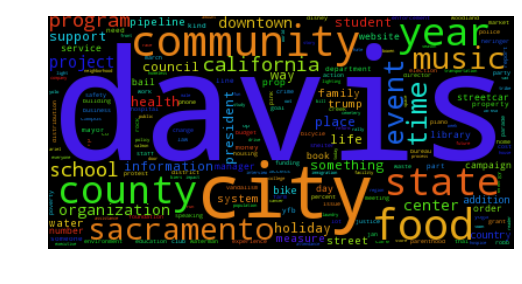

In [15]:
c =  most_common_words(cityCorpus)
generate_word_cloud(c)

From the first wordcloud, we see that aggienews cover everything Davis related with focus on student, community, and city. From the second wordcloud, we see that campus news is centered around students, with other topics releating to research, education. President seem like an important topic, probably due to us coming out of an election year. In campus news, we also see chancellor highlighted, which is no suprise considering the scandals we have regarding the chancellor and we recently got a replacement for the chancellor. In city news, we branch int Sacramento, state, the county.City news does cover slightly different topics than campus news, with a focus on what's going on in Sacramento, the county, and the state. Music and food is also have more significance in city news than on campus. 

In [16]:
def runIDF(corpus):
    textd = {} #dictionary from lemmata to document ids containing that lemma
    for article in corpus:
        s = set(lemmatize(article.lower()))
        try:
            toks = toks | s
        except NameError:
            toks = s
        for tok in s:
            try:
                textd[tok].append(article)
            except KeyError:
                textd[tok] = [article]
    docids = {} #dictionary of the document id to an integer id for the document
    N = len(corpus)
    for i in xrange(N):
        docids[corpus[i]] = i

    tokids = {} #dictionary of lemma to integer id for the lemma
    tok_list = list(toks)
    m = len(tok_list)
    for j in xrange(m):
        tokids[tok_list[j]] = j
    numd = {key:len(set(val)) for key,val in textd.items()}
    logN = np.log(len(articleCorpus))
    idf_smooth = {key:logN - np.log(1 + val) for key, val in numd.items() if val > 1}
    return(idf_smooth)

In [17]:
campusIDF = runIDF(campusCorpus)
cityIDF  = runIDF(cityCorpus)
articleIDF = runIDF(articleCorpus)

(array([  17.,   11.,   11.,   10.,   17.,   16.,   16.,   25.,   50.,
          41.,   55.,   29.,  102.,   73.,   68.,  123.,  187.,    0.,
         285.,  558.]),
 array([ 0.67661788,  0.82723096,  0.97784404,  1.12845711,  1.27907019,
         1.42968327,  1.58029635,  1.73090943,  1.88152251,  2.03213559,
         2.18274867,  2.33336175,  2.48397482,  2.6345879 ,  2.78520098,
         2.93581406,  3.08642714,  3.23704022,  3.3876533 ,  3.53826638,
         3.68887945]),
 <a list of 20 Patch objects>)

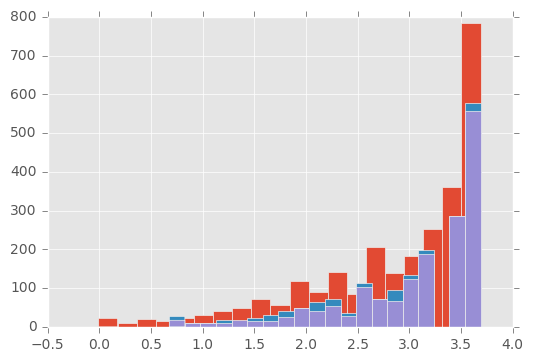

In [18]:
plt.hist(articleIDF.values(), bins=20)
plt.hist(campusIDF.values(),bins=20)
plt.hist(cityIDF.values(), bins=20)

From IDF, we see that there are quite a bit of unqiue lemmatas. 

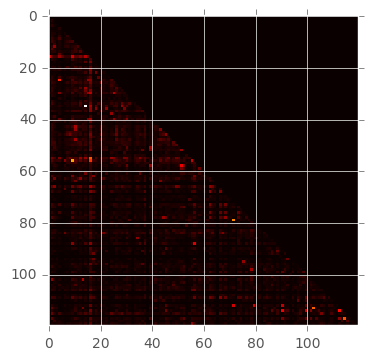

In [19]:
vectorizer = TfidfVectorizer(tokenizer=grab_words,stop_words="english",smooth_idf=True,norm=None,lowercase=True)
tfs = vectorizer.fit_transform(articleCorpus)
sim = tfs.dot(tfs.T)
sim = sim.todense()
#Get lower triangle excluding the diagonal for similarity matrix
lowerTriangle = np.tril(sim) - np.diag(np.diagonal(sim))
plt.imshow(lowerTriangle, cmap='hot', interpolation='nearest')
plt.show()

The top left triangle represent the similarity between campus articles. The lower right triangle represent the similarity between city articles. The square represent the similarity between campus and city articles. We can see that the top left triangle is more highly lit than the others, so campus articles have more similarity. Between city and campus there is still some similarity but not a whole lot judging by the intensity. 

Question 2: What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

In [20]:
vectorizer = TfidfVectorizer(tokenizer=grab_words,stop_words="english",smooth_idf=True,norm=None,lowercase=True)
tfs = vectorizer.fit_transform(articleCorpus)
sim = tfs.dot(tfs.T)
sim = sim.todense()

In [21]:
#Get lower triangle excluding the diagonal for similarity matrix
lowerTriangle = np.tril(sim) - np.diag(np.diagonal(sim))
#Flatten matrix
flatten = lowerTriangle.flatten()
#Sort the elements
flatten.sort()
#Grab top 3 most similar
maxvals = flatten[::-1][0:3]
#Identify the matches
matches = [np.where(lowerTriangle == val) for val in maxvals]

##### The top 3 pairs of most similar articles

In [22]:
print(matches)

[(array([35]), array([14])), (array([56]), array([9])), (array([79]), array([71]))]


In [23]:
aggieData.loc[[item[0] for sublist in matches for item in sublist]]

,author,text,title,type,url
35,Written by: Jayashri Padmanabhan — campus@thea...,"Conference aims to destigmatize mental health,...",UC Davis to host first ever mental health conf...,Campus,https://theaggie.org/2017/01/30/uc-davis-to-ho...
14,Written by: Jayashri Padmanabhan — campus@thea...,"Conference entails full day of speakers, panel...",UC Davis holds first mental health conference,Campus,https://theaggie.org/2017/02/17/uc-davis-holds...
56,Written by: Aaron Liss — campus@theaggie.org,LRDP update preserves Russell Boulevard fields...,Russell Boulevard intramural fields withdrawn ...,Campus,https://theaggie.org/2017/01/15/russell-boulev...
9,[Written by: Ivan Valenzuela — campus@theaggi...,SR #7 asks university to increase capacity for...,ASUCD Senate passes resolution submitting comm...,Campus,https://theaggie.org/2017/02/20/asucd-senate-p...
79,Written by: Kaelyn Tuermer-Lee — city@theaggie...,The Ukulele Kids Club donates instruments to U...,A symphony to children’s ears,City,https://theaggie.org/2017/01/29/a-symphony-to-...
71,Written by: Kaelyn Tuermer-Lee — city@theaggie...,Davis Sunrise Rotary Club grant benefits Alzhe...,The musical train to memory lane,City,https://theaggie.org/2017/02/06/the-musical-tr...


The first top pair of most similar article talks about the first mental health conference, so the topic is basically the same and it's also by the same author, so it wouldn't be too suprising if the body of text is very similar. The second pair of most similar article talks about UCD long range development plan (LRDP), where one article talks about a specific part of the LRDP and the second part is the LRDP in general. the third pair of most similar article is on music and by the same author.

In [28]:
def compare_doc(article1, article2):
    """
    Return list of common words (Nouns) . Input is the article index in the aggieData. 
    """
    art1 = aggieData.loc[article1,'text']
    art2 = aggieData.loc[article2, 'text']
    numWords1Noun = set(grab_words(art1))
    numWords2Noun = set(grab_words(art2))
    numWords1Tok = set(lemmatize(art1))
    numWords2Tok = set(lemmatize(art2))
    common = len(numWords1Noun.intersection(numWords2Noun))
    common1 = len(numWords1Tok.intersection(numWords2Tok))
    print("Common lemmatas make up %.2f %%  of the first article and %.2f %% of the second article" % 
          (float(common1)/len(numWords1Tok)*100, float(common1)/len(numWords2Tok)*100))
    print("Common nouns make up %.2f %%  of the first article and %.2f %% of the second article" % 
          (float(common)/len(numWords1Noun)*100, float(common)/len(numWords2Noun)*100))
    print("The two articles share the following common nouns")
    return(numWords1Noun.intersection(numWords2Noun))

In [29]:
compare_doc(matches[0][0][0],matches[0][1][0])

Common lemmatas make up 55.04 %  of the first article and 35.86 % of the second article
Common nouns make up 35.96 %  of the first article and 26.67 % of the second article
The two articles share the following common nouns


{(u'a.m.', 'NN'),
 (u'administration', 'NN'),
 (u'advocacy', 'NN'),
 (u'application', 'NN'),
 (u'body', 'NN'),
 (u'center', 'NN'),
 (u'chiang', 'NN'),
 (u'closing', 'NN'),
 (u'community', 'NN'),
 (u'conference', 'NN'),
 (u'crisis', 'NN'),
 (u'davis', 'NN'),
 (u'director', 'NN'),
 (u'disability', 'NN'),
 (u'founder', 'NN'),
 (u'funding', 'NN'),
 (u'gender', 'NN'),
 (u'healing', 'NN'),
 (u'health', 'NN'),
 (u'line', 'NN'),
 (u'opportunity', 'NN'),
 (u'p.m.', 'NN'),
 (u'panel', 'NN'),
 (u'place', 'NN'),
 (u'porter', 'NN'),
 (u'prevention', 'NN'),
 (u'process', 'NN'),
 (u'psychology', 'NN'),
 (u'samantha', 'NN'),
 (u'student', 'NN'),
 (u'text', 'NN'),
 (u'workshop', 'NN')}

In [30]:
compare_doc(matches[1][0][0],matches[1][1][0])

Common lemmatas make up 34.65 %  of the first article and 40.14 % of the second article
Common nouns make up 25.00 %  of the first article and 32.22 % of the second article
The two articles share the following common nouns


{(u'campus', 'NN'),
 (u'city', 'NN'),
 (u'construction', 'NN'),
 (u'council', 'NN'),
 (u'davis', 'NN'),
 (u'development', 'NN'),
 (u'draft', 'NN'),
 (u'enrollment', 'NN'),
 (u'growth', 'NN'),
 (u'housing', 'NN'),
 (u'i', 'NN'),
 (u'impact', 'NN'),
 (u'jan.', 'NN'),
 (u'lrdp', 'NN'),
 (u'mayor', 'NN'),
 (u'need', 'NN'),
 (u'notice', 'NN'),
 (u'percent', 'NN'),
 (u'plan', 'NN'),
 (u'planning', 'NN'),
 (u'preparation', 'NN'),
 (u'proposal', 'NN'),
 (u'range', 'NN'),
 (u'read', 'NN'),
 (u'report', 'NN'),
 (u'resolution', 'NN'),
 (u'student', 'NN'),
 (u'university', 'NN'),
 (u'woodland', 'NN')}

In [31]:
compare_doc(matches[2][0][0],matches[2][1][0])

Common lemmatas make up 35.97 %  of the first article and 35.41 % of the second article
Common nouns make up 18.57 %  of the first article and 16.67 % of the second article
The two articles share the following common nouns


{(u'award', 'NN'),
 (u'care', 'NN'),
 (u'club', 'NN'),
 (u'davis', 'NN'),
 (u'founder', 'NN'),
 (u'individual', 'NN'),
 (u'level', 'NN'),
 (u'music', 'NN'),
 (u'organization', 'NN'),
 (u'something', 'NN'),
 (u'time', 'NN'),
 (u'world', 'NN'),
 (u'year', 'NN')}

Question 3: 
Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

This corpus is not representative of the Aggie, because we only focused on the news section. But the Aggie also 7 other sections that we haven't examined. This corpus can support inferences relating to latest news in davis on and off campus. Also whether students plagerize each other's articles. From the most frequent words, we see that davis, campus, community, city, event, and student were mentioned a lot, which is as expected. A little below the list have health, state, president. 